In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import pickle
import collections
import glob
import json
import utils

import matplotlib.pyplot as plt
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('colorblind')

In [2]:
tool_to_domain = {'biobloom': 'nt', 
                  'blastn': 'nt', 
                  'bwa': 'nt', 
                  'bowtie2': 'nt',
                  'groot': 'nt',
                  'hmmsearch_nt': 'nt',
                  'blastp': 'aa', 
                  'blastx': 'nt_to_aa',
                  'paladin': 'nt_to_aa', 
                  'diamond_blastx': 'nt_to_aa', 
                  'diamond_blastp': 'aa',
                  'hmmsearch_aa': 'aa'}

tool_to_paradigm = {'biobloom': 'k-mer', 
                  'blastn': 'BLAST', 
                  'bwa': 'BWT', 
                  'bowtie2': 'BWT',
                  'groot': 'k-mer',
                  'hmmsearch_nt': 'HMM',
                  'blastp': 'BLAST', 
                  'blastx': 'BLAST',
                  'paladin': 'BWT', 
                  'diamond_blastx': 'BLAST', 
                  'diamond_blastp': 'BLAST',
                  'hmmsearch_aa': 'HMM'}

In [3]:
card = utils.CARD('../data/CARD_canonical/card.json')

In [4]:
TOTAL_SEQUENCES = 30317435

def aro_summarise(fp, domain, paradigm, tool, param):
        
    df = pd.read_csv(fp)
    
    if df[df['missed'] < 0].shape[0] != 0:
        assert False
    df = df.rename(columns={'Unnamed: 0': "ARO"})
    df['ARO'] = df['ARO'].astype(str)
    
    # remove the private models without families
    df = df[~df['ARO'].isin(['3000489', '3000309', '3002818'])]

    df['Family'] = df['ARO'].apply(lambda x: card.aro_to_gene_family[x])
    if df[df['missed'] < 0].shape[0] != 0:
        assert False

    
    df['domain'] = domain
    df['tool'] = tool
    df['param'] = params
    df['paradigm'] = paradigm
    
    df['correct_aro_prop'] = df['correct_aro'] / df['totals']
    df['wrong_aro_correct_family_prop'] = df['wrong_aro_correct_family'] / df['totals']
    df['wrong_aro_wrong_family_prop'] = df['wrong_aro_wrong_family'] / df['totals']
    
    # proportion of all hits 
    df['fp_prop'] = df['false_positive'] / (df['false_positive'] + df['correct_aro'])
    
    df['missed_prop'] = df['missed'] / df['totals']
   
    df = df[['Family', 'ARO', 'domain', 'tool', 'param', 'paradigm', 'correct_aro_prop', 
             'wrong_aro_correct_family_prop', 'wrong_aro_wrong_family_prop', 'missed_prop', 'fp_prop']]
    
#     data = {}
#     data['domain'] = domain
#     data['tool'] = tool
#     data['param'] = param
#     data['paradigm'] = paradigm
#     data['overall_miss'] = df['missed'].sum() / df['totals'].sum()
#     data['false_positive'] = df['false_positive'].sum() / (30317435 - 7213828)
#     data['any_rate'] = (df['correct_aro'] + df['wrong_aro_correct_family'] + df['wrong_aro_wrong_family']).sum() / 7213828
    
#     data['miss_AMR_count'] = df['missed'].sum()
#     data['fp_count'] = df['false_positive'].sum()
#     data['any_hit_count'] = (df['correct_aro'] + df['wrong_aro_correct_family'] + df['wrong_aro_wrong_family']).sum()
    
#     data['mean_missed_per_aro'] = (df['missed'] / df['totals']).mean()
#     data['mean_correct_aro_per_aro'] = (df['correct_aro'] / df['totals']).mean()
#     data['mean_correct_family_per_aro'] = ((df['correct_aro'] + df['wrong_aro_correct_family']) / df['totals']).mean()
#     data['mean_any_hit_per_aro'] = ((df['correct_aro'] + df['wrong_aro_correct_family'] + df['wrong_aro_wrong_family']) / df['totals']).mean() 

#     data['median_missed_per_aro'] = (df['missed'] / df['totals']).median()
#     data['median_correct_aro_per_aro'] = (df['correct_aro'] / df['totals']).median()
#     data['median_correct_family_per_aro'] = ((df['correct_aro'] + df['wrong_aro_correct_family']) / df['totals']).median()
#     data['median_any_hit_per_aro'] = ((df['correct_aro'] + df['wrong_aro_correct_family'] + df['wrong_aro_wrong_family']) / df['totals']).median() 

    return df


In [5]:
aro_results = []

for tool_run in glob.glob('tool_runs/*.csv'):
    print(tool_run)
    tool = tool_run.split('/')[1]
    if tool.startswith('diamond') or tool.startswith('hmmsearch'):
        params = '_'.join(tool.split('_')[2:]).replace('.csv', '')
        tool = '_'.join(tool.split('_')[:2])    
    else:
        params = '_'.join(tool.split('_')[1:]).replace('.csv', '')
        tool = tool.split('_')[0]
    
    domain = tool_to_domain[tool]
    paradigm = tool_to_paradigm[tool]
    
    # biobloom doesn't output specific one-to-ones
    if tool not in ['biobloom', 'hmmsearch_nt', 'hmmsearch_aa']:#,'groot']:
        aro_results.append(aro_summarise(tool_run, domain, paradigm, tool, params))
    
    
aro_results = pd.concat(aro_results)
aro_results = aro_results.replace({'aa': 'Protein Query/DB',
                                   'nt': 'DNA Query/DB',
                                   'nt_to_aa': 'DNA Query, Protein DB'})

tool_runs/blastn_megablast_min50.csv
tool_runs/bowtie2_default_default.csv
tool_runs/blastx_default_min50.csv
tool_runs/diamond_blastp_default_min50.csv
tool_runs/diamond_blastx_sensitive_default.csv
tool_runs/groot_card_k5_s256_j090_default.csv
tool_runs/blastp_default_default.csv
tool_runs/diamond_blastx_default_default.csv
tool_runs/biobloom_k5_default.csv
tool_runs/diamond_blastx_more_sensitive_default.csv
tool_runs/biobloom_k5_min0.8.csv
tool_runs/diamond_blastp_more_sensitive_min50.csv
tool_runs/diamond_blastp_default_default.csv
tool_runs/diamond_blastx_sensitive_1e-5.csv
tool_runs/diamond_blastp_default_1e-10.csv
tool_runs/groot_card_k9_s256_j090_default.csv
tool_runs/hmmsearch_nt_default_1e-5.csv
tool_runs/groot_card_k7_s64_j0990_default.csv
tool_runs/hmmsearch_aa_default_min100.csv
tool_runs/blastn_default_default.csv
tool_runs/bwa_default_default.csv
tool_runs/biobloom_k25_default.csv
tool_runs/diamond_blastx_default_min100.csv
tool_runs/blastn_default_1e-5.csv
tool_runs/bla

In [6]:
 


name_tidy = {'blastn': 'BLASTN', 'bwa': 'BWA-MEM', 'bowtie2': "Bowtie2", 'blastx': "BLASTX", 
             'diamond_blastx': "DIAMOND-BLASTX", 'paladin': "PALADIN", 'blastp': "BLASTP", 
             'diamond_blastp': "DIAMOND-BLASTP", 'hmmsearch_nt': 'HMMsearch-NT', 'hmmsearch_aa': 'HMMsearch-AA'}
aro_results['tool'] = aro_results['tool'].replace(name_tidy)


In [7]:
top_by_correct_aro = aro_results.groupby(['tool', 'param'])['correct_aro_prop'].median().reset_index()
pd.options.display.max_rows = 999
top_by_correct_aro.sort_values('correct_aro_prop', ascending=False)

,tool,param,correct_aro_prop
2,BLASTN,default_default,0.616667
0,BLASTN,default_1e-10,0.614855
4,BLASTN,default_min50,0.614855
1,BLASTN,default_1e-5,0.614855
3,BLASTN,default_min100,0.612772
5,BLASTN,megablast_1e-10,0.600000
6,BLASTN,megablast_1e-5,0.600000
7,BLASTN,megablast_default,0.600000
8,BLASTN,megablast_min100,0.600000
9,BLASTN,megablast_min50,0.600000


In [8]:
top_locs = top_by_correct_aro.groupby('tool')['correct_aro_prop'].idxmax()
top_by_correct_aro.loc[top_locs].sort_values('correct_aro_prop')

,tool,param,correct_aro_prop
73,groot,card_k9_s64_j0900_default,0.008333
31,DIAMOND-BLASTP,default_1e-10,0.433333
61,PALADIN,default_default,0.433333
53,DIAMOND-BLASTX,more_sensitive_default,0.440833
10,BLASTP,default_1e-10,0.450000
16,BLASTX,default_1e-5,0.452190
20,BWA-MEM,default_default,0.550000
28,Bowtie2,l_sensitive_default,0.550000
2,BLASTN,default_default,0.616667


In [9]:
top_by_correct_aro = aro_results.groupby(['tool', 'param'])['correct_aro_prop'].mean().reset_index()
top_by_correct_aro_ix = top_by_correct_aro.groupby('tool')['correct_aro_prop'].idxmax()
top_by_correct_aro = top_by_correct_aro.loc[top_by_correct_aro_ix]
top_by_correct_aro_mean_order = top_by_correct_aro.sort_values('correct_aro_prop')['tool']


aro_results['tool_param'] = aro_results['tool'] + ' ' + aro_results['param']
top_by_correct_aro['tool_param'] = top_by_correct_aro['tool'] + ' ' + top_by_correct_aro['param']

# filter our big results table to just best results for each tool
best_aro_results_per_tool = aro_results[aro_results['tool_param'].isin(top_by_correct_aro['tool_param'])]

In [10]:
best_aro_results_per_tool.groupby(['tool_param'])['fp_prop'].mean().sort_values()

tool_param
groot card_k9_s64_j0900_default          0.034515
Bowtie2 l_very_sensitive_default         0.061315
PALADIN min5_default                     0.095687
DIAMOND-BLASTP more_sensitive_default    0.174999
DIAMOND-BLASTX more_sensitive_default    0.177016
BLASTX default_default                   0.251976
BLASTP default_default                   0.281857
BWA-MEM low_default                      0.307182
BLASTN default_default                   0.825763
Name: fp_prop, dtype: float64

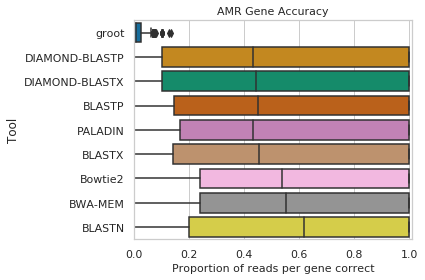

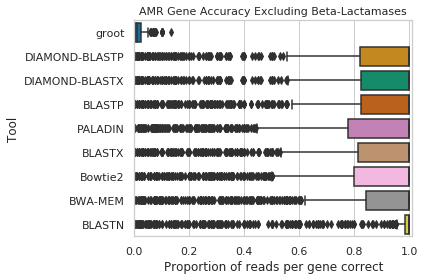

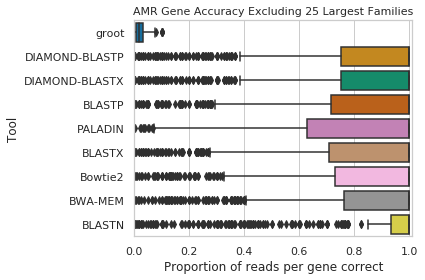

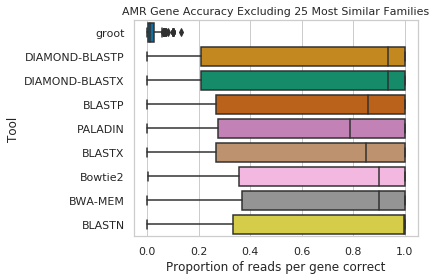

In [25]:
sns.boxplot(data=best_aro_results_per_tool, x='correct_aro_prop', y='tool', order=top_by_correct_aro_mean_order)
plt.xlim(0,1.01)
plt.title('AMR Gene Accuracy', fontsize=11)
plt.xlabel('Proportion of reads per gene correct', fontsize=11)
plt.ylabel('Tool')
plt.tight_layout()
plt.savefig('figures/draft_figures/gene_accuracy.svg', dpi=300)
plt.savefig('figures/draft_figures/gene_accuracy.png', dpi=300)
plt.show()

# what about if we dump all beta lactamases
no_bl = best_aro_results_per_tool[~best_aro_results_per_tool['Family'].str.contains('lactamase')]
sns.boxplot(data=no_bl, x='correct_aro_prop', y='tool', order=top_by_correct_aro_mean_order)
plt.xlim(0,1.01)
plt.title('AMR Gene Accuracy Excluding Beta-Lactamases', fontsize=11)
plt.xlabel('Proportion of reads per gene correct')
plt.ylabel('Tool')
plt.tight_layout()
plt.savefig('figures/draft_figures/gene_no_bl.png', dpi=300)
plt.show()

# without 25 biggest families
biggest = list(card.family_sizes.most_common(25))
biggest = [x[0] for x in biggest]
no_biggest = best_aro_results_per_tool[~best_aro_results_per_tool['Family'].isin(biggest)]
sns.boxplot(data=no_biggest, x='correct_aro_prop', y='tool', order=top_by_correct_aro_mean_order)
plt.xlim(0,1.01)
plt.title('AMR Gene Accuracy Excluding 25 Largest Families', fontsize=11)
plt.xlabel('Proportion of reads per gene correct')
plt.ylabel('Tool')
plt.tight_layout()
plt.savefig('figures/draft_figures/gene_no_biggest.png', dpi=300)
plt.show()



# let's try removing the most similar 25 families
nuc = pd.read_csv('pairwise_nucleotide_blast_results.csv')
non_self = nuc.query('qseqid != sseqid')
singleton_families = [family for family in card.family_sizes if card.family_sizes[family] == 1]
non_self = non_self[~non_self['query_family'].isin(singleton_families)]
within_family = non_self.query('query_family == subject_family')
most_similar_families = list(within_family.groupby('query_family')['bitscore_norm'].describe().sort_values('50%', ascending=False).head(25).index)

no_most_sim = best_aro_results_per_tool[~best_aro_results_per_tool['Family'].isin(most_similar_families)]
plt.title('AMR Gene Accuracy Excluding 25 Most Similar Families', fontsize=11)
sns.boxplot(data=no_most_sim, x='correct_aro_prop', y='tool', order=top_by_correct_aro_mean_order)
plt.ylabel('Tool')
plt.xlabel('Proportion of reads per gene correct')
plt.tight_layout()
plt.savefig('figures/draft_figures/gene_no_similar.png', dpi=300)


In [147]:
overall_mean = best_aro_results_per_tool['correct_aro_prop'].describe()['mean']

In [164]:
no_most_sim.groupby('tool')['correct_aro_prop'].describe()['50%'].sort_values()

tool
groot             0.011111
paladin           0.788889
blastx            0.850000
blastp            0.857143
bowtie2           0.900000
bwa               0.900000
diamond_blastp    0.933333
diamond_blastx    0.933333
blastn            0.996359
Name: 50%, dtype: float64

In [143]:
no_most_sim['correct_aro_prop'].describe()['mean'] - overall_mean

0.10373464057798598

In [165]:
no_biggest['correct_aro_prop'].describe()['mean'] - overall_mean
no_biggest.groupby('tool')['correct_aro_prop'].describe()['50%'].sort_values()

tool
groot             0.016667
blastn            1.000000
blastp            1.000000
blastx            1.000000
bowtie2           1.000000
bwa               1.000000
diamond_blastp    1.000000
diamond_blastx    1.000000
paladin           1.000000
Name: 50%, dtype: float64

In [145]:
no_bl['correct_aro_prop'].describe()['mean'] - overall_mean

0.2532846786296864

In [60]:
small_df = best_aro_results_per_tool[['Family', 'ARO', 'tool', 'correct_aro_prop']]
median_correct = small_df.groupby('tool')['correct_aro_prop'].describe()['50%']
median_correct = median_correct.reset_index()
median_correct['Family_Excluded'] = "None"
median_correct= median_correct.set_index('tool')
import tqdm
exclusion_delta = pd.DataFrame(index = median_correct.index)
for family in tqdm.tqdm(small_df['Family'].unique()):
    non_family = small_df[small_df['Family'] != family].groupby('tool')['correct_aro_prop'].describe()['50%']
    non_family = non_family.reset_index()
    non_family['Family_Excluded'] = family
    non_family = non_family.set_index('tool')
    diff = non_family['50%'] - median_correct['50%']
    exclusion_delta[family] = diff

100%|██████████| 246/246 [00:05<00:00, 43.67it/s]


In [75]:
order = exclusion_delta.describe().T.sort_values('50%').reset_index()['index']

In [158]:
exclusion_delta.describe().T.sort_values('50%', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
TEM beta-lactamase,9.0,0.059552,0.034176,0.000286,0.050000,0.059167,0.064435,0.133333
SHV beta-lactamase,9.0,0.057143,0.029712,0.000758,0.050000,0.058787,0.064435,0.116667
OXA beta-lactamase,9.0,0.055120,0.030386,-0.000333,0.047810,0.050000,0.064435,0.116667
CTX-M beta-lactamase,9.0,0.048278,0.022811,0.000000,0.040870,0.047810,0.059167,0.083333
CMY beta-lactamase,9.0,0.028305,0.015499,0.000000,0.025000,0.031102,0.033333,0.058333
PDC beta-lactamase,9.0,0.012256,0.006043,0.000000,0.009167,0.014477,0.016667,0.016667
ACT beta-lactamase,9.0,0.011846,0.006413,0.000000,0.009167,0.014477,0.016667,0.016667
quinolone resistance protein (qnr),9.0,0.015858,0.017890,-0.002231,0.000000,0.014477,0.016667,0.046667
ADC beta-lactamase,9.0,0.012384,0.006662,0.000000,0.009167,0.014477,0.016667,0.020000
VIM beta-lactamase,9.0,0.010802,0.005745,-0.000111,0.007143,0.013218,0.014477,0.016667


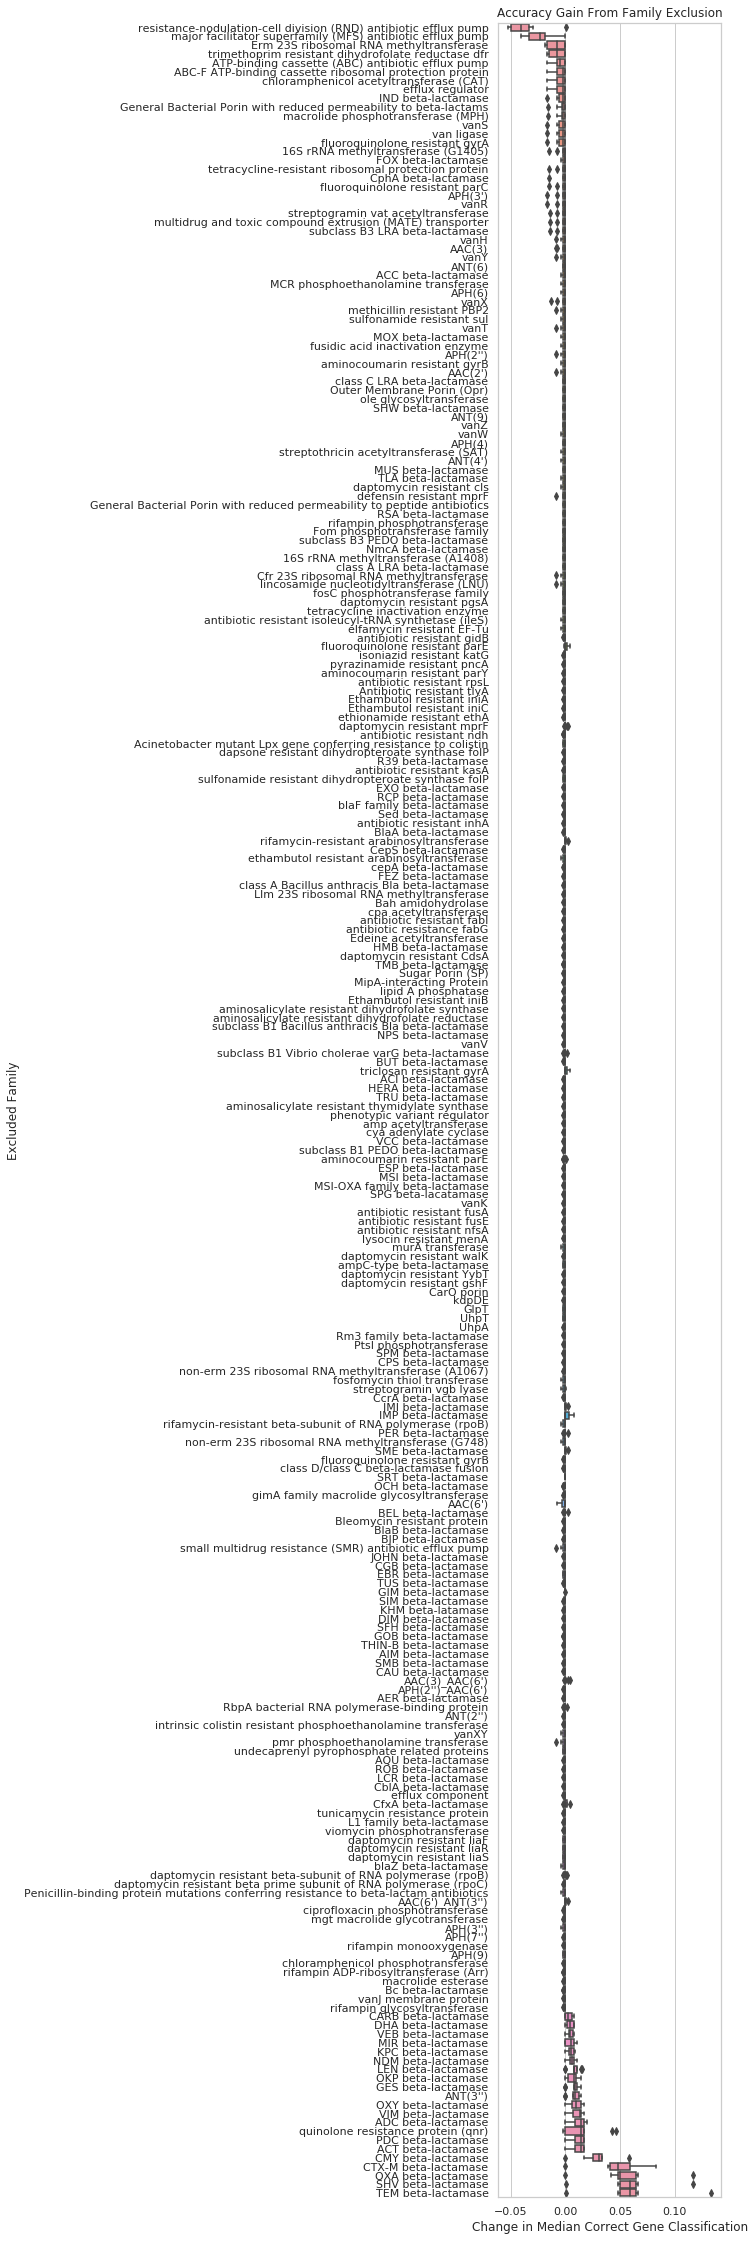

In [85]:
melt_df = pd.melt(exclusion_delta, var_name='Excluded Family', value_name='Median Accuracy Change')

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(4, 40)

sns.boxplot(data = melt_df, y='Excluded Family', x = 'Median Accuracy Change', order=order, ax=ax)
plt.title('Accuracy Gain From Family Exclusion')
plt.ylabel('Excluded Family')
plt.xlabel('Change in Median Correct Gene Classification')
plt.savefig('figures/draft_figures/sup_family_gain.svg')

In [82]:
melt_df.groupby('Excluded Family')['Median Accuracy Change'].describe()['50%']

,count,mean,std,min,25%,50%,75%,max
Excluded Family,,,,,,,,
16S rRNA methyltransferase (A1408),9.0,-0.000781,0.000977,-0.002190,-0.001812,-0.000111,0.000000,0.000000
16S rRNA methyltransferase (G1405),9.0,-0.003062,0.005029,-0.014843,-0.002231,-0.000562,0.000000,0.000000
AAC(2'),9.0,-0.001941,0.002920,-0.008657,-0.002231,-0.000222,0.000000,0.000000
AAC(3),9.0,-0.002318,0.003404,-0.008657,-0.002231,-0.000281,0.000000,0.000000
AAC(3)_AAC(6'),9.0,0.000620,0.001588,-0.000833,0.000000,0.000000,0.000000,0.004167
AAC(6'),9.0,-0.001901,0.002655,-0.007500,-0.003210,0.000000,0.000000,0.000000
AAC(6')_ANT(3''),9.0,0.000539,0.000911,-0.000111,0.000000,0.000000,0.000833,0.002190
ABC-F ATP-binding cassette ribosomal protection protein,9.0,-0.005684,0.006824,-0.016667,-0.007500,-0.002231,-0.000333,0.000000
ACC beta-lactamase,9.0,-0.001012,0.001343,-0.003623,-0.002190,-0.000235,0.000000,0.000000


In [65]:
exclusion_delta.describe().T.sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
TEM beta-lactamase,9.0,0.059552,0.034176,0.000286,0.050000,0.059167,0.064435,0.133333
SHV beta-lactamase,9.0,0.057143,0.029712,0.000758,0.050000,0.058787,0.064435,0.116667
OXA beta-lactamase,9.0,0.055120,0.030386,-0.000333,0.047810,0.050000,0.064435,0.116667
CTX-M beta-lactamase,9.0,0.048278,0.022811,0.000000,0.040870,0.047810,0.059167,0.083333
CMY beta-lactamase,9.0,0.028305,0.015499,0.000000,0.025000,0.031102,0.033333,0.058333
PDC beta-lactamase,9.0,0.012256,0.006043,0.000000,0.009167,0.014477,0.016667,0.016667
ACT beta-lactamase,9.0,0.011846,0.006413,0.000000,0.009167,0.014477,0.016667,0.016667
quinolone resistance protein (qnr),9.0,0.015858,0.017890,-0.002231,0.000000,0.014477,0.016667,0.046667
ADC beta-lactamase,9.0,0.012384,0.006662,0.000000,0.009167,0.014477,0.016667,0.020000
VIM beta-lactamase,9.0,0.010802,0.005745,-0.000111,0.007143,0.013218,0.014477,0.016667


In [54]:
diff

tool
blastn           -0.016667
blastp            0.000000
blastx           -0.002190
bowtie2          -0.002231
bwa              -0.005556
diamond_blastp    0.000000
diamond_blastx   -0.007500
groot            -0.000333
paladin           0.000000
Name: 50%, dtype: float64

In [46]:
non_family

,tool,50%,Family_Excluded
0,blastn,0.600000,family
1,blastp,0.450000,family
2,blastx,0.450000,family
3,bowtie2,0.533333,family
4,bwa,0.544444,family
5,diamond_blastp,0.433333,family
6,diamond_blastx,0.433333,family
7,groot,0.008000,family
8,paladin,0.433333,family


In [16]:
# gain figures 
# - remove BL
# - remove biggest
# - remove most varied
# - remove least varied

In [26]:
df = best_aro_results_per_tool.query('tool == "blastp"')
bl = df[df['Family'].str.contains('lactamase')]
family = bl['Family'].unique()
family

array(['class A Bacillus anthracis Bla beta-lactamase',
       'blaZ beta-lactamase', 'NDM beta-lactamase', 'CcrA beta-lactamase',
       'BlaB beta-lactamase', 'L1 family beta-lactamase',
       'FEZ beta-lactamase', 'JOHN beta-lactamase', 'CGB beta-lactamase',
       'EBR beta-lactamase', 'MUS beta-lactamase', 'TUS beta-lactamase',
       'GIM beta-lactamase', 'SIM beta-lactamase', 'DIM beta-lactamase',
       'SFH beta-lactamase', 'GOB beta-lactamase',
       'THIN-B beta-lactamase', 'AIM beta-lactamase',
       'SMB beta-lactamase', 'CAU beta-lactamase', 'BJP beta-lactamase',
       'TEM beta-lactamase', 'SHV beta-lactamase', 'OXA beta-lactamase',
       'ACC beta-lactamase', 'ACT beta-lactamase', 'CMY beta-lactamase',
       'IMI beta-lactamase', 'CTX-M beta-lactamase', 'DHA beta-lactamase',
       'FOX beta-lactamase', 'MIR beta-lactamase', 'MOX beta-lactamase',
       'IMP beta-lactamase', 'CARB beta-lactamase', 'IND beta-lactamase',
       'VIM beta-lactamase', 'KPC beta-lactam

In [17]:
best_aro_results_per_tool

,Family,ARO,domain,tool,param,paradigm,correct_aro_prop,wrong_aro_correct_family_prop,wrong_aro_wrong_family_prop,missed_prop,fp_prop,tool_param
0,van ligase,3000005,Protein Query/DB,blastp,default_default,BLAST,1.000000,0.000000,0.000000,0.000000,0.748428,blastp default_default
1,van ligase,3000010,Protein Query/DB,blastp,default_default,BLAST,1.000000,0.000000,0.000000,0.000000,0.370079,blastp default_default
2,van ligase,3000013,Protein Query/DB,blastp,default_default,BLAST,1.000000,0.000000,0.000000,0.000000,0.523810,blastp default_default
3,ATP-binding cassette (ABC) antibiotic efflux pump,3000024,Protein Query/DB,blastp,default_default,BLAST,0.996386,0.000000,0.002252,0.001362,0.198854,blastp default_default
4,ATP-binding cassette (ABC) antibiotic efflux pump,3000025,Protein Query/DB,blastp,default_default,BLAST,1.000000,0.000000,0.000000,0.000000,0.375397,blastp default_default
5,multidrug and toxic compound extrusion (MATE) ...,3000026,Protein Query/DB,blastp,default_default,BLAST,0.999928,0.000000,0.000000,0.000072,0.030326,blastp default_default
6,major facilitator superfamily (MFS) antibiotic...,3000027,Protein Query/DB,blastp,default_default,BLAST,0.999801,0.000000,0.000033,0.000166,0.169423,blastp default_default
7,major facilitator superfamily (MFS) antibiotic...,3000074,Protein Query/DB,blastp,default_default,BLAST,0.998241,0.000038,0.000473,0.001248,0.055284,blastp default_default
8,class A Bacillus anthracis Bla beta-lactamase,3000090,Protein Query/DB,blastp,default_default,BLAST,0.984127,0.000000,0.015873,0.000000,0.044053,blastp default_default
9,ABC-F ATP-binding cassette ribosomal protectio...,3000118,Protein Query/DB,blastp,default_default,BLAST,1.000000,0.000000,0.000000,0.000000,0.875389,blastp default_default


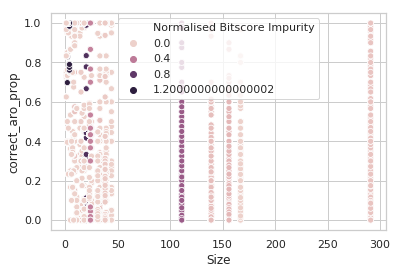

In [8]:
contam = pd.read_pickle('family_sequence_diversity/contamination_per_family.pkl')
contam = contam.rename(columns={'query_family': 'Family'})
contam = contam.set_index('Family')
contam['Size'] = pd.Series(card.family_sizes)
contam = contam.reset_index()

df = pd.merge(aro_results.query('tool == "diamond_blastx"'), contam, on='Family')
df = df[df['Family'].str.contains('beta-lactamase')]
sns.scatterplot(data = df, y='correct_aro_prop', hue='Normalised Bitscore Impurity', x='Size')